# Принятие решений в бизнесе
**Цель:** 
- Приоритизировать гипотезы по увеличению выручки интернет-магазина с различными параметрами: Reach, Impact, Confidence, Effort; 
- Провести оценку результатов А/В-теста по ключевым метрикам: выручка по группам, средний чек по группам, среднее количество заказов на посетителя по группам.

**Ход работы**:
- Считать данные из файла, предоставленного отделом маркетинга, для приоритезации гипотез;
- Приоритизировать гипотезы фреймворками ICE и RICE и отсортировать их по убыванию приоритета;
- Сравнить изменения в приоритизации гипотез при применении этих двух фреймворков;
- Считать данные из файлов для анализа А/В-теста;
- Проанализировать результаты А/В-теста:
    - Построить графики куммулятивной выручки по группам;
    - Построить графики куммулятивного среднего чека по группам и относительного изменения этого чека группы В к группе А;
    - Построить графики куммулятивного среднего количества заказов на посетителя по группам и относительного изменения этого количества заказов на посетителя группы В к группе А;
    - Построить точечный график количества заказов по пользователям;
    - Посчитать 95-й и 99-й перцентили количества заказов по пользователям;
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным;
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным;
    - Посчитать статистическую значимость различий в среднем количестве заказов на посетитея между группами по "очищенным" данным;
    - Посчитать статистическую значимость различий в среднем чеке заказа между группами по "очищенным"  данным;
- Сделать выводы и принять решение по результатам теста:
    - Остановить тест и зафиксировать победу одной из групп;
    - Отсановить тест и зафиксировать отсутствие различий между группами;
    - Продолжить тест;

### Предобработка данных

Подключим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st

Считаем данные из файла с содержанием гипотез.

In [2]:
hypothesis = pd.read_csv('dataset/hypothesis.csv')
hypothesis.info()

#Снимаем ограничение на ширину столбцов, для корректного отображения гипотез 
pd.set_option('display.max_colwidth', None)
#Приводим названия столбцов таблицы к нижнему регистру
hypothesis.columns = [x.lower() for x in hypothesis.columns]
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


При первичном знакомстве с датафреймом мы видим, что в нем содержится 9 выдвинутых гипотез. Всего представлено 4 параметра: Reach, Impact, Confidence и Efforts. Каждому из этих параметров соответствует оценка по 10-бальной шкале. 

### Приоритизация гипотез

#### Фреймворк ICE
Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


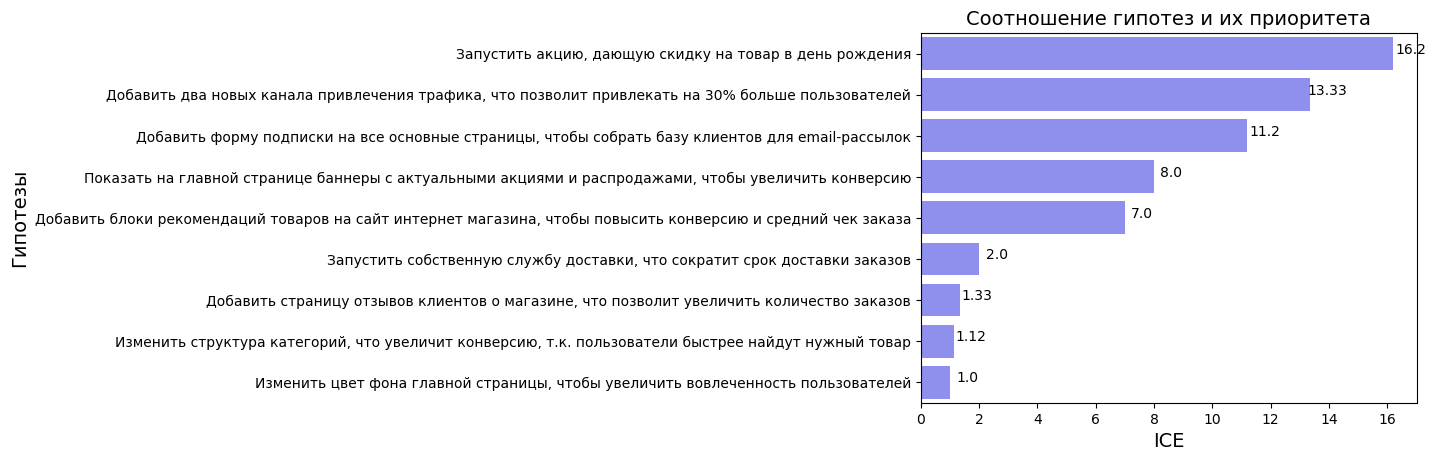

In [3]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] /
                    hypothesis['efforts'])

display(round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 2))

#Построим гистограмму
sns.barplot(data=hypothesis.sort_values(by='ICE', ascending=False), x='ICE', y='hypothesis', color='blue', alpha=0.5)
for i, v in enumerate(hypothesis['ICE'].sort_values(ascending=False)):
    plt.text(v+0.6, i, str(round(v, 2)), ha = 'center', size = 10)
plt.title('Соотношение гипотез и их приоритета', fontsize=14)
plt.ylabel('Гипотезы', fontsize=14)
plt.xlabel('ICE', fontsize=14)
plt.show()

Из графика и таблицы выше видно, что в приоритете находятся 5 гипотез. Им и следует уделить больше внимания.

#### Фреймворк RICE

Рассчитаем теперь RICE для гипотез и добавим полученные значения к существующей таблице.

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


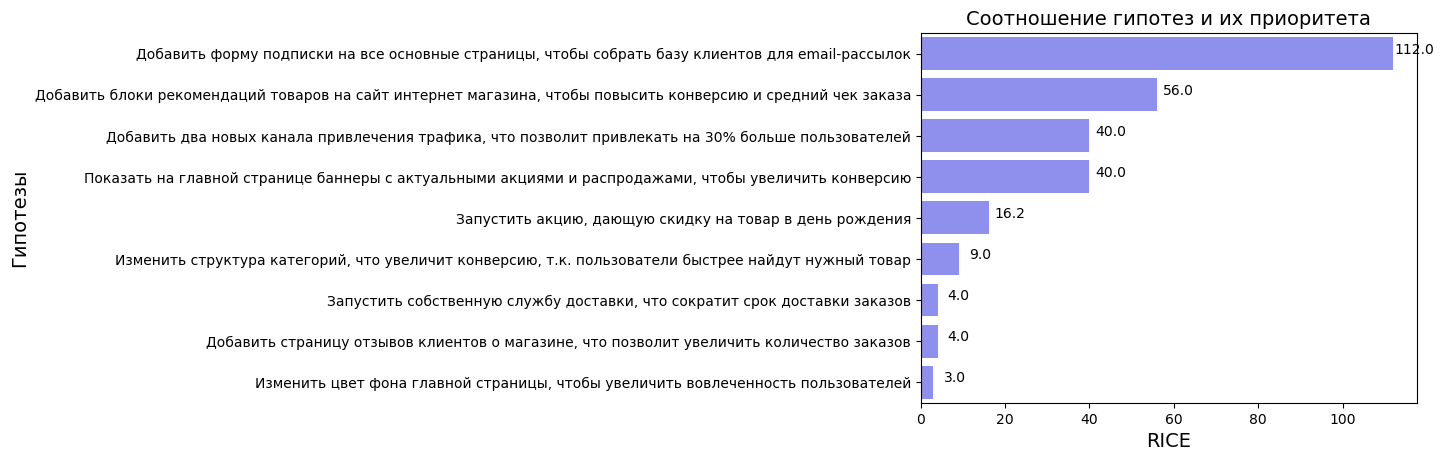

In [4]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] /
                    hypothesis['efforts'])

display(round(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False), 2))

#Построим гистограмму
sns.barplot(data=hypothesis.sort_values(by='RICE', ascending=False), x='RICE', y='hypothesis', color='blue', alpha=0.5)
for i, v in enumerate(hypothesis['RICE'].sort_values(ascending=False)):
    plt.text(v+5, i, str(round(v, 2)), ha = 'center', size = 10)
plt.title('Соотношение гипотез и их приоритета', fontsize=14)
plt.ylabel('Гипотезы', fontsize=14)
plt.xlabel('RICE', fontsize=14)
plt.show()

Как и в случае с подсчетом ICE, здесь наблюдаем похожую ситуацию. В приоритете те же самые 5 гипотез, но в другой последовательности. Для сравнения значений ICE и RICE выведем на экран таблицу.

In [5]:
#Выведем на экран таблицу сравнения ICE и RICE
display(round(hypothesis[['hypothesis','ICE', 'RICE']].sort_values(by='RICE', ascending=False), 2))

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


В отличие от ICE фреймворк RICE учитывает скольких пользователей затронет изменение, которое хочется внести, поэтому приоритизация гипотез получилась разной.

В данном случае наиболее перспективной является гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для e-mail рассылок", так как она имеет самый высокую оценку, рассчитанную по фреймворку RICE, даже по сравнению с другими перспективными гипотезами, а также она окажет влияние на наибольшее количество пользователей.


### Анализ A/B-теста

Результаты А/В-теста содержатся в файлах orders и visitors, считаем эти файлы для использования в дальнейшем анализе.

In [6]:
orders = pd.read_csv('D:\\Практикум теория\\PROJECTS\\prioritization_of_hypotheses\\orders.csv')
visitors = pd.read_csv('D:\\Практикум теория\\PROJECTS\\prioritization_of_hypotheses\\visitors.csv')

In [7]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
visitors.info()
visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Названия некоторых столбцов написаны некорректно, заменим его. Также поменяем тип даты с object на datetime. Так как количество ненулевых элементов совпадает, то пропусков нет.

In [9]:
orders.columns = [x.replace('Id', '_id') for x in orders.columns]
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
orders.info()
visitors.info()
display(orders, visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Прежде чем строить графики, необходимо собрать кумулятивные данные. Для начала создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(). Соберем агрегированные кумулятивные по дням данные в несколько действий.

In [11]:
dates_groups = orders[['date', 'group']].drop_duplicates()

#Получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'
        }
    ), axis=1
).sort_values(by=['date','group'])

#Объединяем кумулятивные данные в одной таблице и переименовываем столбцы 
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим совпадают ли максимальные и минимальные даты в созданном датафрейме cumulative_data с максимальными и минимальными датами в исходных датафреймах.

In [12]:
class color:
    BOLD='\033[1m'
    GREEN='\033[92m'
    END = '\033[0m'
    
print('Максимальная дата "orders":', color.BOLD + '', orders['date'].max(), '|' + color.END,\
      'Минимальная дата "orders":', color.BOLD + '', orders['date'].min(), '' + color.END)
print('Максимальная дата "visitors":', color.BOLD + '', visitors['date'].max(), '|' + color.END,\
      'Минимальная дата "visitors":', color.BOLD + '', visitors['date'].min(), '' + color.END)
print('Максимальная дата "cumulative_data":', color.BOLD + '',\
      cumulative_data['date'].max(), color.BOLD + '|' + color.END, 'Минимальная дата "cumulative_data":',\
      color.BOLD + '', cumulative_data['date'].min())

Максимальная дата "orders":  2019-08-31 00:00:00 | Минимальная дата "orders":  2019-08-01 00:00:00 
Максимальная дата "visitors":  2019-08-31 00:00:00 | Минимальная дата "visitors":  2019-08-01 00:00:00 
Максимальная дата "cumulative_data":  2019-08-31 00:00:00 | Минимальная дата "cumulative_data":  2019-08-01 00:00:00


Минимальные и максимальные даты во всех таблицах совпадают.

#### Построим график кумулятивной выручки по дням по группам.

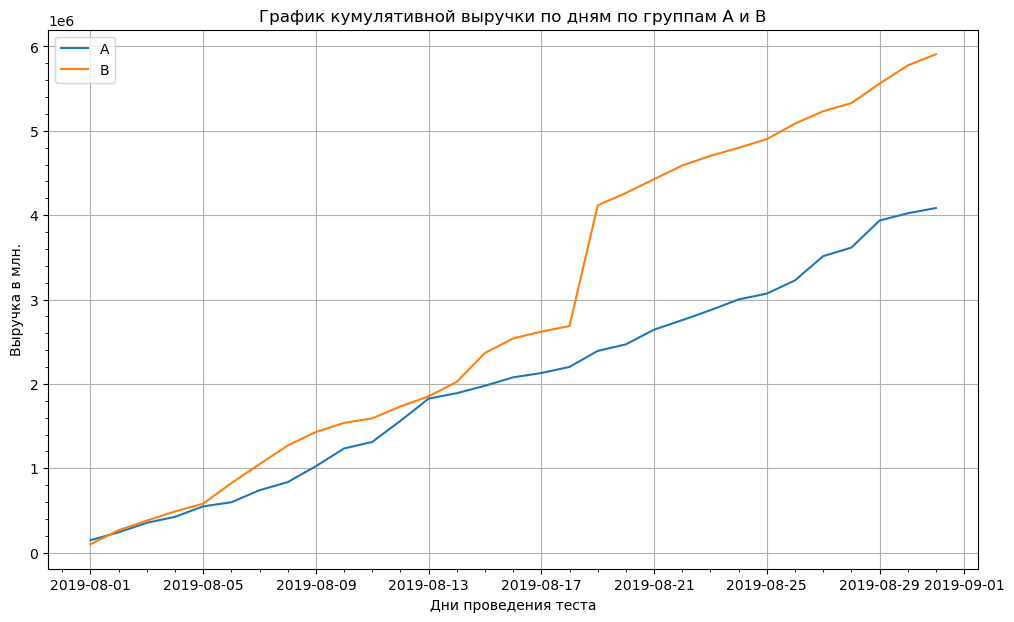

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))
# Строим график выручки группы А и B
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по дням по группам А и В')
plt.ylabel('Выручка в млн.')
plt.xlabel('Дни проведения теста')
plt.minorticks_on()
plt.grid(which='major')
plt.legend()
plt.show()

Глядя на график, можно заметить, что выручка группы В больше выручки группы А. График группы А линейно растет, при этом в группе В в районе "2019-08-18" есть резкий скачок роста выручки. Данный скачок может говорить о том, что в группе В произошел всплеск числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Построим график кумулятивного среднего чека по группам.

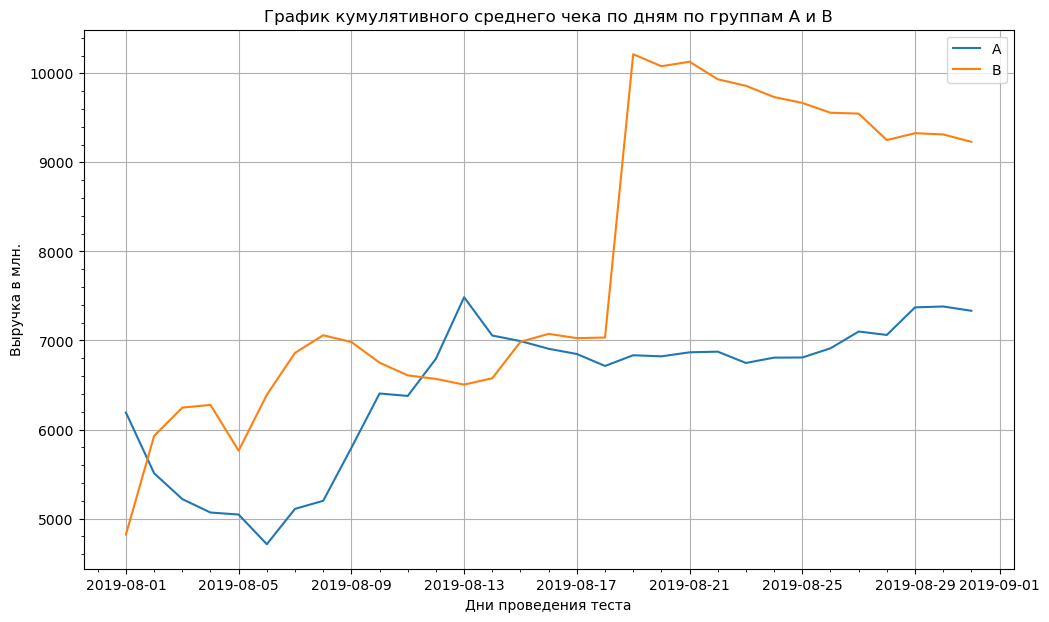

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         label='A')
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         label='B')
plt.title('График кумулятивного среднего чека по дням по группам А и В')
plt.ylabel('Выручка в млн.')
plt.xlabel('Дни проведения теста')
plt.minorticks_on()
plt.grid(which='major')
plt.legend() 
plt.show()

Ближе к концу средний чек группы А начинает стабилизироваться, а в группе В в середине теста был резкий скачок, что может говорить о том, что действительно были совершены дорогие заказы.

#### Построение графика относительного изменения кумулятивного среднего чека группы В к группе А

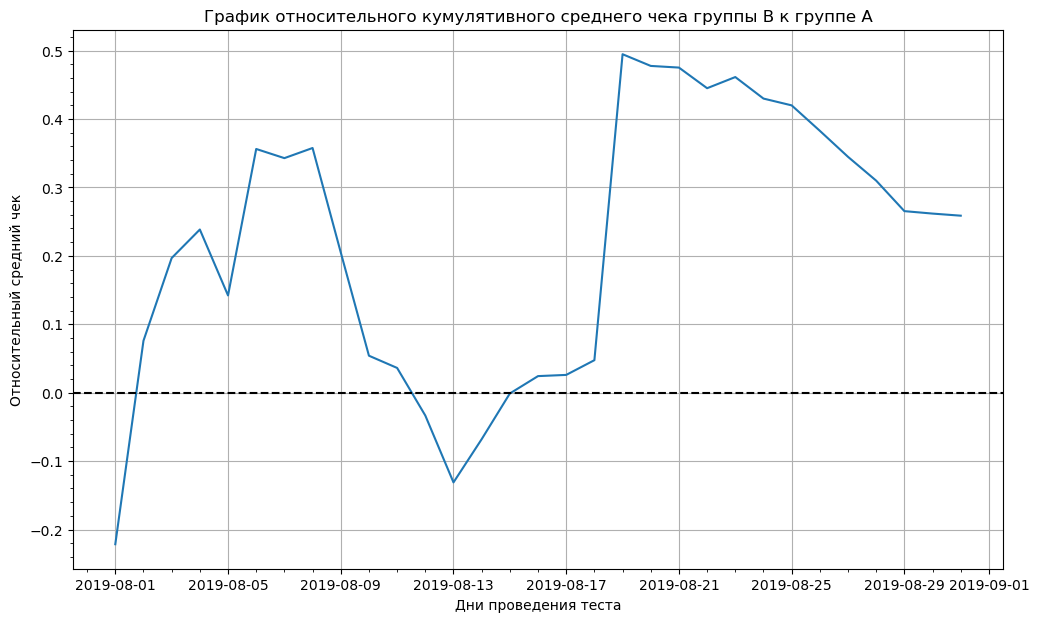

In [15]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

plt.figure(figsize=(12, 7))
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
         /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного кумулятивного среднего чека группы В к группе А')
plt.ylabel('Относительный средний чек')
plt.xlabel('Дни проведения теста')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

В нескольких точках график резко скачет, скорее всего есть крупные заказы и выбросы.


#### Построение графика кумулятивного среднего количества заказов на посетителя по группам.

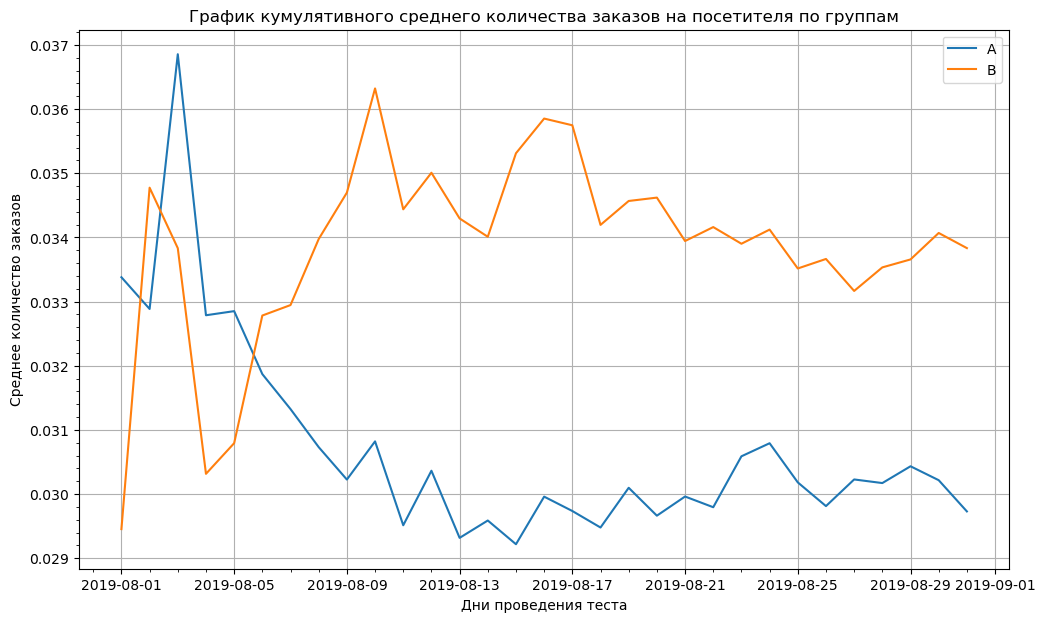

In [16]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A и В
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12, 7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Среднее количество заказов')
plt.xlabel('Дни проведения теста')
plt.minorticks_on()
plt.grid(which='major')
plt.legend()
plt.show()

У группы А был резкий скачок вверх, после чего среднее количество заказов начало снижаться, у группы В был резкий скачок, после чего среднее количество заказов продолжило расти. Результат группы В выглядит луче, чем группы А.


#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

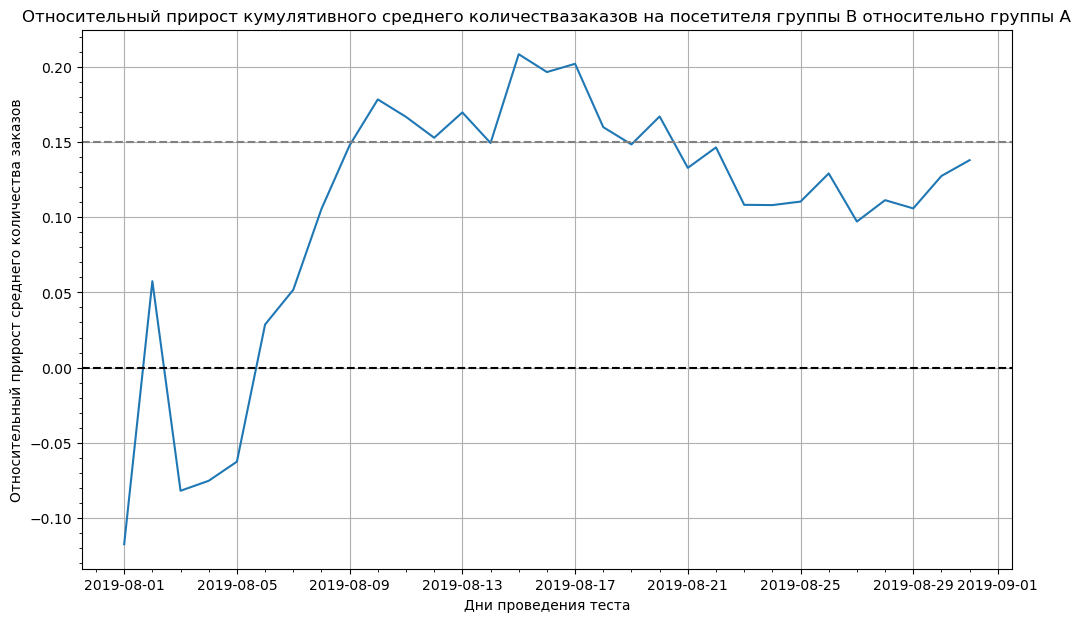

In [17]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b'])

plt.figure(figsize=(12, 7))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_b']/
         merged_cumulative_conversions['conversion_a']-1, 
        )
plt.title('Относительный прирост кумулятивного среднего количества\
заказов на посетителя группы B относительно группы A')
plt.ylabel('Относительный прирост среднего количества заказов')
plt.xlabel('Дни проведения теста')
plt.minorticks_on()
plt.grid(which='major')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

В начале теста группа В проигрывала группе А, но после "2019-08-06" ее конверсия начала стремительно расти. После "2019-08-20" конверсия группы В начала немного спадать, однако теперь конверсия снова начинает расти. Если принимать во внимание графики выше, то оно показывали нам, чтобы были совершены крупные заказы.


#### Построение точечного графика количества заказов по пользователям.

Построим гистограмму распределения числа заказов по пользователям, а затем построим точечную диаграмму используя метод scatter().

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


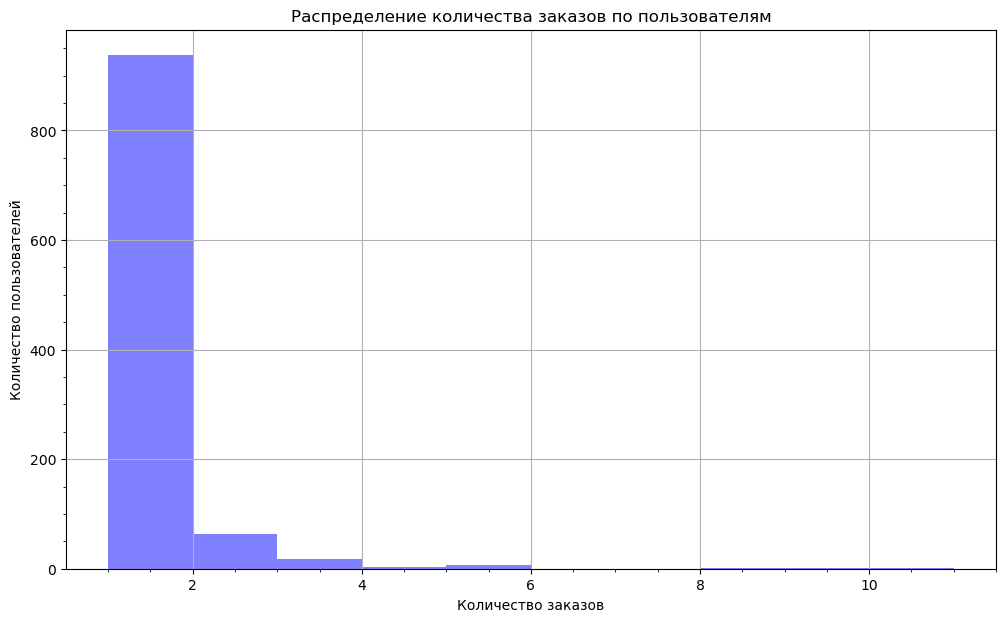

In [18]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['visitor_id', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

plt.figure(figsize=(12, 7))
plt.hist(orders_by_users['orders'], color='blue', alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

По гистограмме видно, что большинство пользователей совершили 1 заказ, были и такие, которые совершили 11 заказов. Построим точечный график.

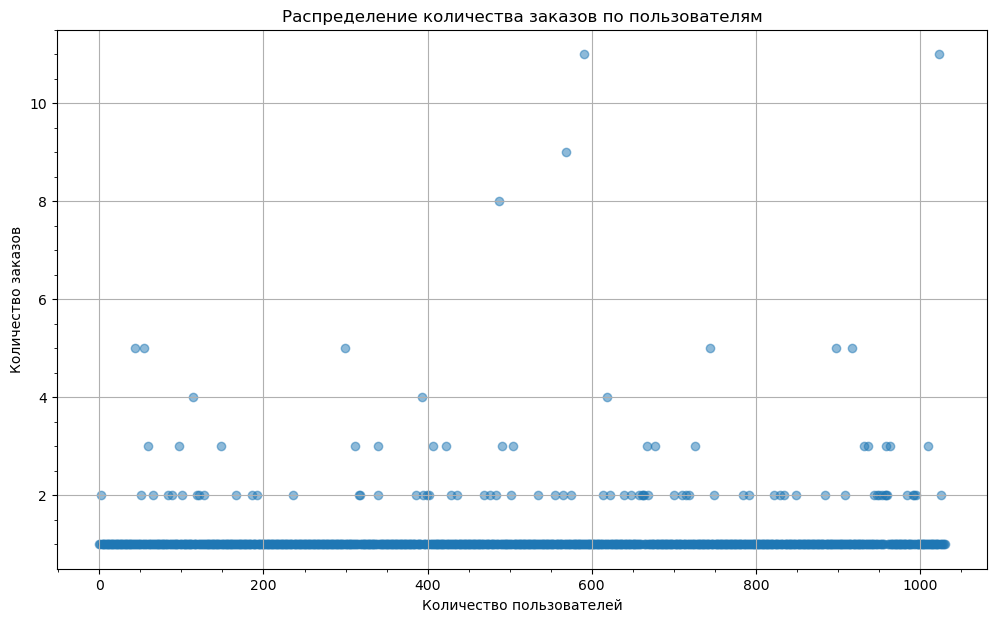

In [19]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

Помимо пользователей совершивших 1 заказ, много пользователей совершивших 2 заказа. Чтобы более точно понять, какие значения являются выбросами, посчитаем 95 и 99 перцентили количества заказов на пользователя.

In [20]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше 2-х покупок, пока длилось тестирование. Только 1% пользователей совершил во время тестирования более 4х заказов. Поэтому за верхнюю границу можно принять 4 заказа на пользователя.


#### Построение точечного графика стоимостей заказов.

Построим гистограмму стоимостей заказов по пользователям, чтобы узнать были ли дорогостоящие заказы, а затем построим точечный график методом scatter().

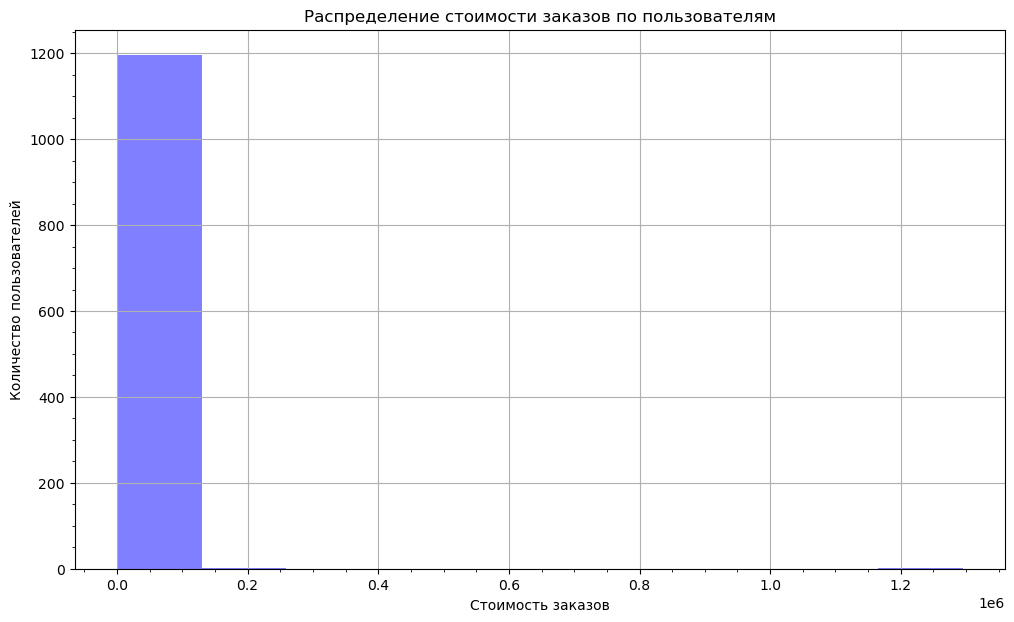

In [21]:
plt.figure(figsize=(12, 7))
plt.hist(orders['revenue'], color='blue', alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

На гистограмме видно, что один из заказов был стоимостью более 1.2 млн.

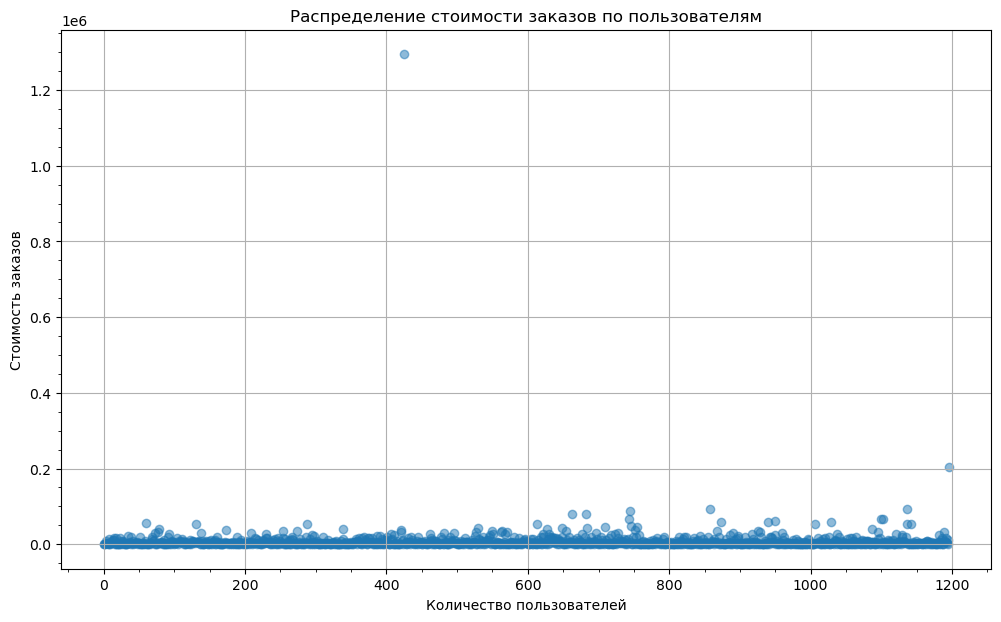

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

Теперь мы видим на точечном графике 1 заказ на 1.3 млн., который выделяется среди всех заказов. Этот заказ и мог вызвать всплеск на графиках кумулятивных метрик. Также на графике видим выброс в районе 0.2 млн.

Построим график без этих двух заказов.


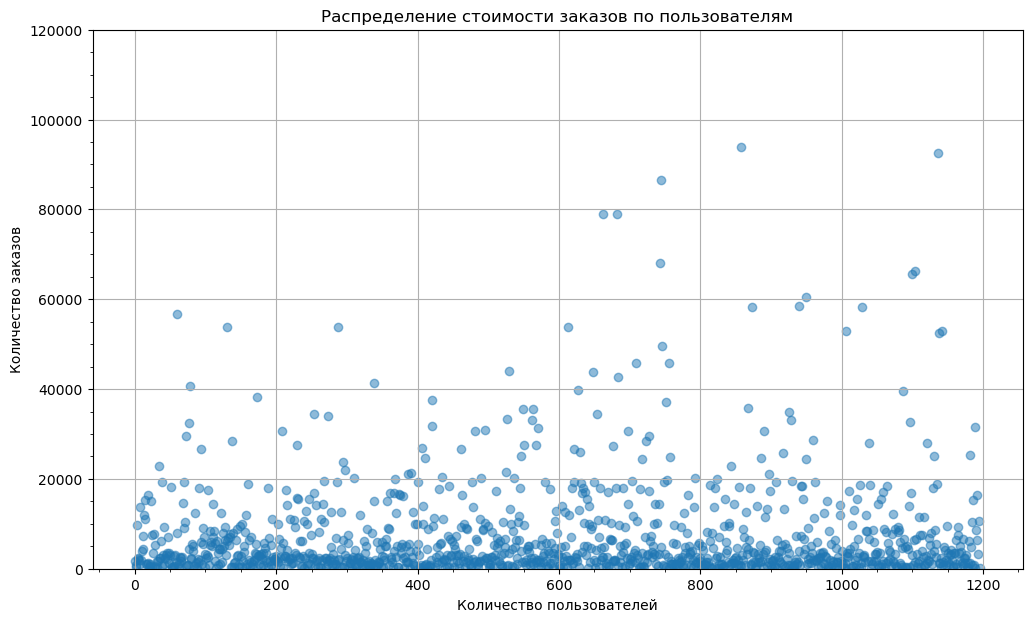

In [23]:
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 120000)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.minorticks_on()
plt.grid(which='major')
plt.show()

Основаная масса заказов находится в пределах 20000.

Посчитаем 95-й и 99-й перцентили стоимости заказов для определения границы аномальных заказов.


In [24]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


По данным результатам граница - это 58233, именно до ее гранищ совершено до 99% заказов.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Ранее мы выяснили, что в данных есть выбросы, увидели эти выбросы и определили границу для их определения. Посчитаем статистическую значимость в среднем количестве заказов на пользователя и среднем чеке между группами по "сырым" данным, то есть без удаления аномальных пользователей. 

Для этого сформулируем нулевую и альтернативную гипотезы:
- **Нулевая**: различий в среднем количестве заказов на посетителя между группами нет
- **Альтернативная**: различия в среднем количестве заказов на посетителя есть.

Уровень статистической значимости определим как 0.05. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [25]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_a_daily.merge(
        orders_a_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,orders_per_date_a_x,revenue_per_date_a_x,orders_per_date_a_y,revenue_per_date_a_y,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,24,148579,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,20,93822,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,24,112473,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,16,70825,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,25,124218,109,549917,101,581995,756,707,3318,3280


Данная таблица содержит следующие поля:

`date` — дата;

`orders_per_date_a` — количество заказов в выбранную дату в группе A;

`revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;

`orders_per_date_b` — количество заказов в выбранную дату в группе B;

`revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;

`orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;

`revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;

`orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;

`revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;

`visitors_per_date_a` — количество пользователей в выбранную дату в группе A;

`visitors_per_date_b` — количество пользователей в выбранную дату в группе B;

`visitors_cummulative_a`  — количество пользователей до выбранной даты включительно в группе A;

`visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные orders_by_users_a и orders_by_users_b. В этих переменных укажем число совершенных заказов для пользователей, которые совершили заказ хотя бы 1 раз.


In [26]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [27]:
sample_a = pd.concat([orders_by_users_a['orders'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -\
                                                  len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -\
                                                  len(orders_by_users_b['orders'])), name='orders')],axis=0)

Применим критерий Манна-Уитни, отформатируем p-value, округлив его до 3х знаков после запятой, выведем относительный прирост конверсси группы В.


In [28]:
def check_hypothesis(a, b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(a, b)[1]
    print('p_value равен: ', "{0:.3f}".format(p_value))

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между группами есть разница.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу: статистически значимых различий\
 в среднем чеке заказов между группами нет')

    print('Относительный прирост группы В равен', "{0:.3%}"
          .format(b.mean() / a.mean() - 1))

In [29]:
check_hypothesis(sample_a, sample_b)

p_value равен:  0.017
Отвергаем нулевую гипотезу: между группами есть разница.
Относительный прирост группы В равен 13.808%


Так как p_value получился меньше статистической значимости, то нулевая гипотеза и том, что статистически значимых различий в конверсии между группами нет, была отвергнута. Относительный прирост группы В равен 13.8%.


#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выдвинем нулевую и альтернативную гипотезы:
- **Нулевая**: различий в среднем чеке заказа между группами нет;
- **Альтернативная**: различия в среднем чеке заказа между группами есть.

Уровень значимости установим как 0.05. Для рассчета статистической значимости, передадим критерию манна-Уитни данные о выручке с заказов.

In [30]:
check_hypothesis(orders[orders['group']=='A']['revenue'], 
                 orders[orders['group']=='B']['revenue'])

p_value равен:  0.729
Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке заказов между группами нет
Относительный прирост группы В равен 25.871%


P-value получился больше статистической значимости, поэтому нет причин отвергать нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет. Прри этом средний чек группы В намного выше среднего чека группы А. 

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил 5 и более заказов или совершили покупку дороже 58233. Следовательно мы уберем 1% пользователей, совершивших дорогие заказы и 1% пользователей, совершивших самое большое количество заказов. 

`users_with_many_orders` - срез пользователей с количеством заказов больше 4;
`users_with_expensive_orders` - срез пользователей, совершивших заказы дороже 58233.

Объединим этих пользователей в одну таблицу - `abnormal_users` и атрибутом shape узнаем количество таких пользователей.

In [31]:
orders_by_users_a

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [32]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] >\
                          np.percentile(orders_by_users['orders'], 99)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] >\
                          np.percentile(orders_by_users['orders'], 99)]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] >\
                                     np.percentile(orders['revenue'], 99)]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
15


Всего 15 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста.


In [33]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [34]:
check_hypothesis(sample_a_filtered, sample_b_filtered)

p_value равен:  0.014
Отвергаем нулевую гипотезу: между группами есть разница.
Относительный прирост группы В равен 15.331%


На очищенных данных разница в среднем количестве заказов на пользователей между группами есть. Относительный прирост конверсии группы В относительно группы А увеличился до 15.331%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [35]:
check_hypothesis(
    orders[(orders['group']=='A') & np
           .logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np
           .logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'])

p_value равен:  0.851
Не получилось отвергнуть нулевую гипотезу: статистически значимых различий в среднем чеке заказов между группами нет
Относительный прирост группы В равен -0.575%


P-value получилось больше статистической значимости, поэтому нет причин отвергать нулевую гипотезу в пользу альтернативной. По разнице средних чеков групп различий практически нет.

### Вывод

В данной работе был проведен исследовательский анализ на основании данных предоставленных интернет-магазином.

В первой части проекта была проведена приоритизация гипотез из списка, предоставленного отделом маркетинга. Были выявлены топ-3 гипотезы на которых рекомендуется сфокусировать внимание, без учета того, какое количество пользователей затронут данные изменения:

- Запустить акцию, дающую скидку на товар в день рождения; 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей ;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

Если необходимо учитывать количество пользователей, которых затронут изменения, тогда можно выделить следующие топ-3 гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок ;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа; 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Во второй части проекта был проведен анализ А/В-теста. При анализе было выявлено следующее:

- График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показал, что результаты группы В лучше результатов группы А;
- Есть статистически значимое различие по конверсии между группами А и В как по "сырым", так и по "очищенным" данным, после отбрасывания аномальных значений. Конверсия группы В выше конверсии группы А на 15%;
- Статистически значимого различия в среднем чеке заказа между группами А и В нет, ни по "сырым", ни по "очищенным" ланным. Средний чек пользователей группы В на "очищенных" данных выше среднего чека группы А на 2%.

На основании всего вышеописанного, рекомендуется остановить тест, зафиксировав победу за группой В. 